In [6]:
import torch
import gym
import sys
sys.path.append("../environments") 

from hall_problem import HallProblem

class HallProblemSemiGradientQL:
    def __init__(self, gamma=0.99, alpha=0.05):
        self.gamma = gamma
        self.alpha = alpha
        self.n_states = 6
        self.n_actions = 2
        
        # One-hot features for 6 states
        self.features = torch.eye(self.n_states, dtype=torch.float, requires_grad=False)
        
        # Initialize weights
        self.weights = torch.randn((self.n_states, self.n_actions), requires_grad=True)
    
    def q_value(self, state, action):
        return self.features[state] @ self.weights[:, action]
    
    def update(self, state, action, reward, next_state):
        q_val = self.q_value(state, action)
        max_q_next = torch.max(self.q_value(next_state, 0), self.q_value(next_state, 1))
        target = reward + self.gamma * max_q_next
        
        q_val.backward()
        with torch.no_grad():
            self.weights += self.alpha * (target - q_val) * self.weights.grad
            self.weights.grad.zero_()
    
    def train(self, env, n_steps=1000):
        history = []
        state = env.reset()
        
        for step in range(n_steps):
            action = env.action_space.sample()  # Random exploration
            next_state, reward, done, _ = env.step(action)
            self.update(state, action, reward, next_state)
            state = env.reset() if done else next_state
            
            history.append(self.weights[:, 1].detach().numpy().copy())  # Track action 1
        
        return history

# Example usage:
env = gym.make('HallProblem-v0')
agent = HallProblemSemiGradientQL()
history = agent.train(env, n_steps=100000)

c:\Users\m4mou\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\m4mou\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\m4mou\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(
c:\Users\m4mou\AppData\Local\Programs\Python\Python312\Lib

In [7]:
history

[array([ 0.07292744,  1.4464167 ,  0.6554385 , -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 array([ 0.07292744,  1.4094919 ,  0.6554385 , -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 array([ 0.07292744,  1.4094919 ,  0.61828256, -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 array([ 0.07292744,  1.4094919 ,  0.61828256, -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 array([ 0.07292744,  1.4094919 ,  0.61828256, -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 array([ 0.07292744,  1.3760971 ,  0.61828256, -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 array([ 0.07292744,  1.3760971 ,  0.61828256, -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 array([ 0.07292744,  1.3760971 ,  0.61828256, -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 array([ 0.13739787,  1.3760971 ,  0.61828256, -2.0309186 , -0.07612191,
         0.15403937], dtype=float32),
 

In [8]:
import gym
import torch
import collections
import matplotlib
import matplotlib.pyplot as plt

The MDP should obtain a uniform distribution of state visits under its behavioral policy. Or in other words, when following the behavioral policy for some time, all 7 states should receive approximately equal number of visits.

In [9]:
def behavior(env):
    """ Calculates action taken by Baird's counterexample behavioral policy. """
    if float(torch.rand(1)) < (1 / env.observation_space.n):
        return 1 # Solid action
    else:
        return 0 # Dashed action

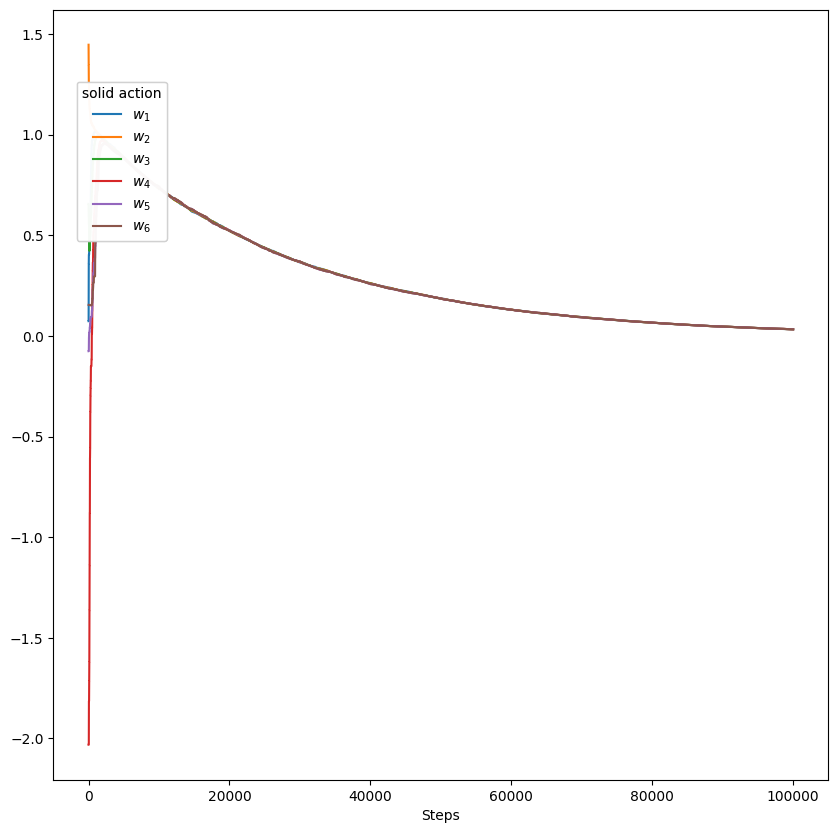

In [10]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

labels = [f"$w_{i+1}$" for i in range(6)]

plt.gca().set_prop_cycle(None)
solid_lines = plt.plot(history, linestyle='-', label=labels)
plt.gca().set_prop_cycle(None)

solid_legend = plt.legend(handles=solid_lines, title='solid action', loc=[0.03, 0.7])

plt.gca().add_artist(solid_legend)

plt.xlabel("Steps")

plt.show()